In [12]:
%matplotlib notebook
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from matplotlib import cm
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import maskoceans


In [2]:
path = "bmp_me_PA05.bin"

In [3]:
data = pickle.load(open(path, "rb"))

In [4]:
data.keys()

dict_keys(['basemap', 'lons', 'ME', 'lats'])

In [5]:
margin = 1
bmp = data["basemap"]
lons, lats, me = [data[k][margin:-margin, margin:-margin] for k in ["lons", "lats", "ME"]]
me.shape

(210, 210)

In [6]:
def show_gridcells(xc, yc, linewidth=0.2, stride=10, ax=None, free_domain_poly_margin=None):
    if ax is None:
        ax = plt.gca()
    
    dx = (xc[1, 1] - xc[0, 0])
    dy = (yc[1, 1] - yc[0, 0])
    
    
    dx_s = dx * stride
    dy_s = dy * stride
    
    nx, ny = xc.shape
    
    for i in range(0, nx, stride):
        for j in range(0, ny, stride):
            x0, y0 = xc[i, j] - dx / 2, yc[i, j] - dy / 2
             
            xy = [(x0, y0), (x0, y0 + dy_s), (x0 + dx_s, y0 + dy_s), (x0 + dx_s, y0)]
            p = Polygon(np.array(xy), facecolor="none", edgecolor="k", linewidth=linewidth, 
                        zorder=10)
            ax.add_patch(p)

    if free_domain_poly_margin is not None:
        x0, y0 = xc[free_domain_poly_margin, free_domain_poly_margin] - dx / 2, yc[free_domain_poly_margin, free_domain_poly_margin] - dy / 2
        x1, y1 = xc[-free_domain_poly_margin, -free_domain_poly_margin] - dx / 2, yc[-free_domain_poly_margin, -free_domain_poly_margin] - dy / 2
        xy = [(x0, y0), (x0, y1), (x1, y1), (x1, y0)]
        p = Polygon(np.array(xy), facecolor="none", edgecolor="k", linewidth=10 * linewidth, linestyle="dashed",
                        zorder=10)
        ax.add_patch(p)
    
    
    

<IPython.core.display.Javascript object>


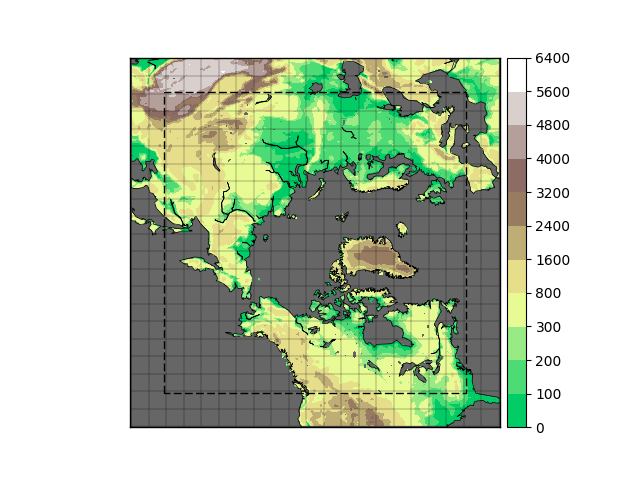

/Users/huziy/.virtualenvs/py3/lib/python3.4/site-packages/ipykernel/__main__.py:20: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


In [22]:
clevs = [0, 100, 200, 300, 800, ] + list(np.arange(1600, 7200, 800))
bn = BoundaryNorm(clevs, len(clevs) - 1)

xx, yy = bmp(lons, lats)

stride = 10

show_gridcells(xx, yy, ax=plt.gca(), stride=stride, linewidth=0.1, free_domain_poly_margin=19)

bmp.drawmapboundary(fill_color="0.4")

cmap_cols = cm.get_cmap("terrain")(np.linspace(0.25, 1, 100))
cmap = LinearSegmentedColormap.from_list("terrain_cut", cmap_cols, N=len(clevs) - 1)


# bmp.pcolormesh(xx_ll, yy_ll, np.ma.masked_all_like(xx_ll), edgecolor="0.75", zorder=10, linewidth=0.01)
to_plot = maskoceans(np.where(lons < 180, lons, lons - 360), lats, me, inlands=True)

# Show the negative elevations with the same color as 0
to_plot[(to_plot < 0) & (~to_plot.mask)] = 0


cs = bmp.contourf(xx, yy, to_plot, cmap=cmap, levels=clevs, norm=bn)
bmp.drawcoastlines(linewidth=0.5)
bmp.colorbar(cs, ticks=clevs)
plt.savefig("topo_PA05.png", bbox_inches="tight", dpi=300)